In [1]:
import torch

# Check if GPU is available
print(f"GPU Available: {torch.cuda.is_available()}")
print(f"Device Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

GPU Available: True
Device Name: Tesla P100-PCIE-16GB


In [2]:
import os

# Correct dataset path with trailing space
base_path = "/kaggle/input/road-sign-detection/Road_Sign_Detection"

# Define paths to train and test folders
train_images_path = os.path.join(base_path, "train/images")
train_labels_path = os.path.join(base_path, "train/labels")
test_images_path = os.path.join(base_path, "test/images")
test_labels_path = os.path.join(base_path, "test/labels")

# Check if directories are not empty and confirm
if os.listdir(train_images_path):
    print("Train images path is correct and contains data.")
else:
    print("Train images path is empty or incorrect.")

if os.listdir(train_labels_path):
    print("Train labels path is correct and contains data.")
else:
    print("Train labels path is empty or incorrect.")


Train images path is correct and contains data.
Train labels path is correct and contains data.


In [3]:
#import os

# Correct dataset path with trailing space
#base_path = "/kaggle/input/road-sign-detection/Road_Sign_Detection"

# Define paths to train folders
#train_images_path = os.path.join(base_path, "train/images")
#train_labels_path = os.path.join(base_path, "train/labels")

# Get list of image and label files
image_files = os.listdir(train_images_path)
label_files = os.listdir(train_labels_path)

# Check for mismatches
for img_file in image_files:
    label_file = img_file.replace(".jpg", ".txt")
    if label_file not in label_files:
        print(f"Label not found for: {img_file}")


In [4]:
import os
import cv2

def load_labels(label_path, img_shape):
    """Load YOLO-style labels and convert normalized values to pixel coordinates."""
    height, width = img_shape[:2]
    boxes = []

    with open(label_path, 'r') as f:
        for line in f.readlines():
            values = line.strip().split()
            class_id = int(values[0])
            x_center = float(values[1]) * width
            y_center = float(values[2]) * height
            box_width = float(values[3]) * width
            box_height = float(values[4]) * height

            # Convert to (xmin, ymin, xmax, ymax) format
            xmin = int(x_center - box_width / 2)
            ymin = int(y_center - box_height / 2)
            xmax = int(x_center + box_width / 2)
            ymax = int(y_center + box_height / 2)

            boxes.append([class_id, xmin, ymin, xmax, ymax])
    
    return boxes

# Search for a specific image
search_criteria = "roundabout"  # You can change this search pattern

# Find an image that matches the search criteria
matching_images = [img for img in os.listdir(train_images_path) if search_criteria in img]

# Process each matching image
for image_file in matching_images:
    image_path = os.path.join(train_images_path, image_file)
    label_file = image_file.replace(".jpg", ".txt")
    label_path = os.path.join(train_labels_path, label_file)

    if os.path.exists(label_path):
        # Load the image and labels
        img = cv2.imread(image_path)
        labels = load_labels(label_path, img.shape)

        print(f"Image: {image_file}")
        print(f"Loaded labels: {labels}")
    else:
        print(f"Label file not found for: {image_file}")


Image: roundabout-sign-on-post-DRKX30_jpg.rf.9f015f3de648b38f6a0ffe1d25e6b545.jpg
Loaded labels: [[24, 136, 197, 526, 373]]
Image: roundabout-sign-on-post-DRKX30_jpg.rf.b0abbd798bf6cdc4299dc04b0f1ee6d3.jpg
Loaded labels: [[24, 136, 197, 526, 373]]
Image: blue-road-sign-showing-roundabout-260nw-1933163222_webp.rf.d2294dd92faa4cdfe11441b5ad888b0a.jpg
Loaded labels: [[24, 111, 140, 513, 386]]
Image: roundabout-sign-and-snow-covered-road-B8HFPE_jpg.rf.fc08956c9de7080ab0b8ba21db44fcd3.jpg
Loaded labels: [[24, 112, 85, 359, 247]]
Image: closeup-of-the-roundabout-sign-in-city-2PYHFFR_jpg.rf.4b95ab2155949e4ac3bebd571274b625.jpg
Loaded labels: [[24, 168, 83, 473, 475]]
Image: roundabout-street-sign-with-blue-cloudy-skies_jpg.rf.70f2fc4af87ef870b497cad09d26e655.jpg
Loaded labels: [[24, 336, 249, 517, 542]]
Image: roundabout-crossroad-road-traffic-sign-260nw-112940494_webp.rf.f8cad001a76489b48b748a36355b2bdb.jpg
Loaded labels: [[24, 135, 46, 519, 350]]
Image: roundabout-street-sign-with-blue-clou

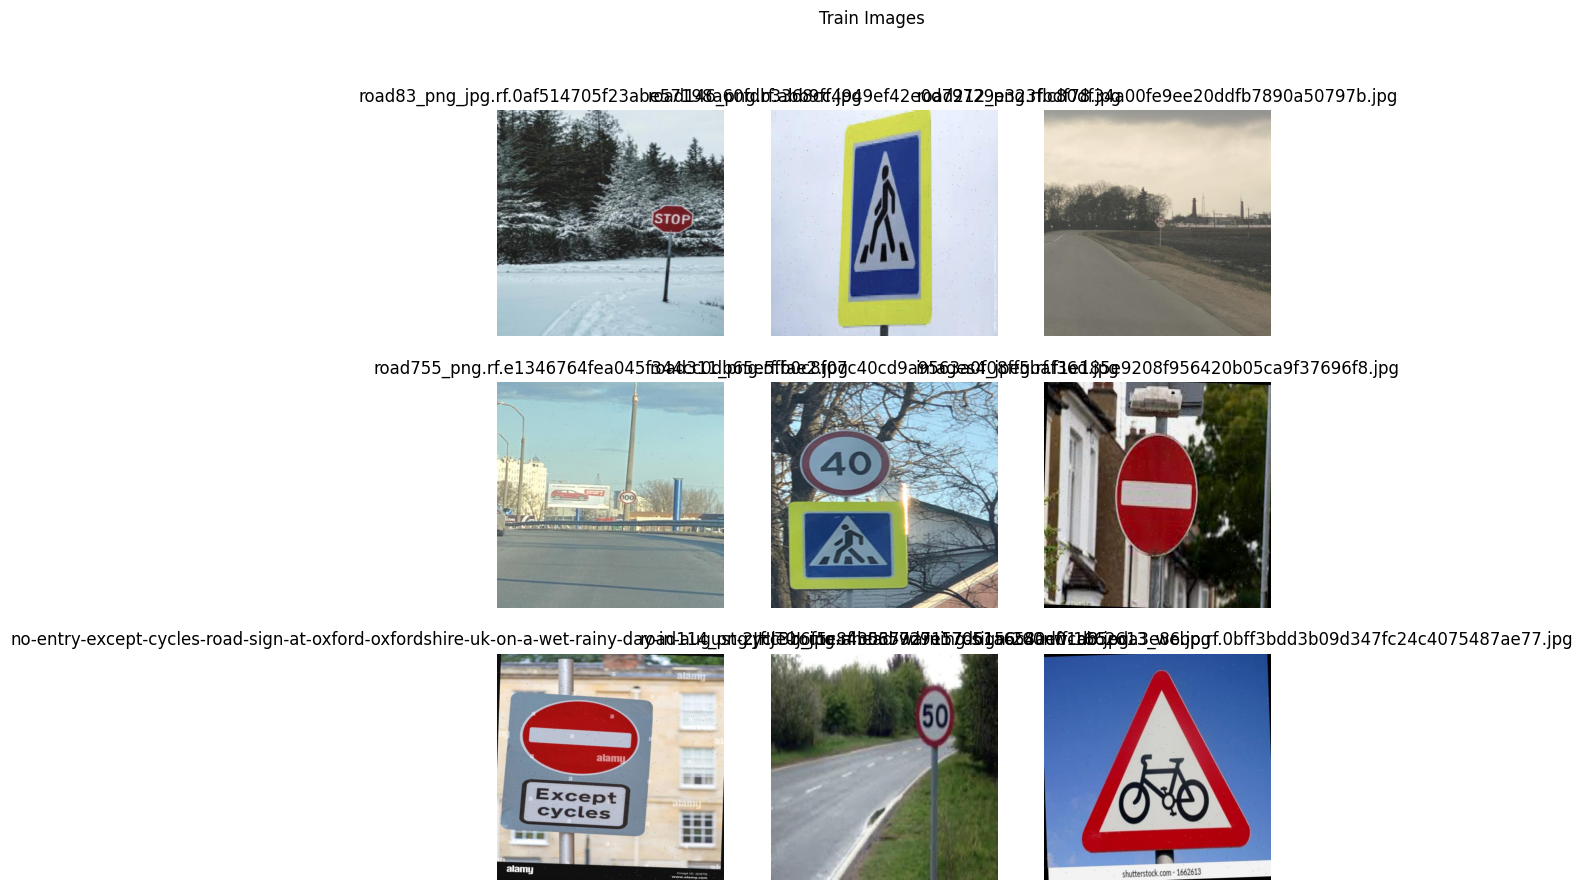

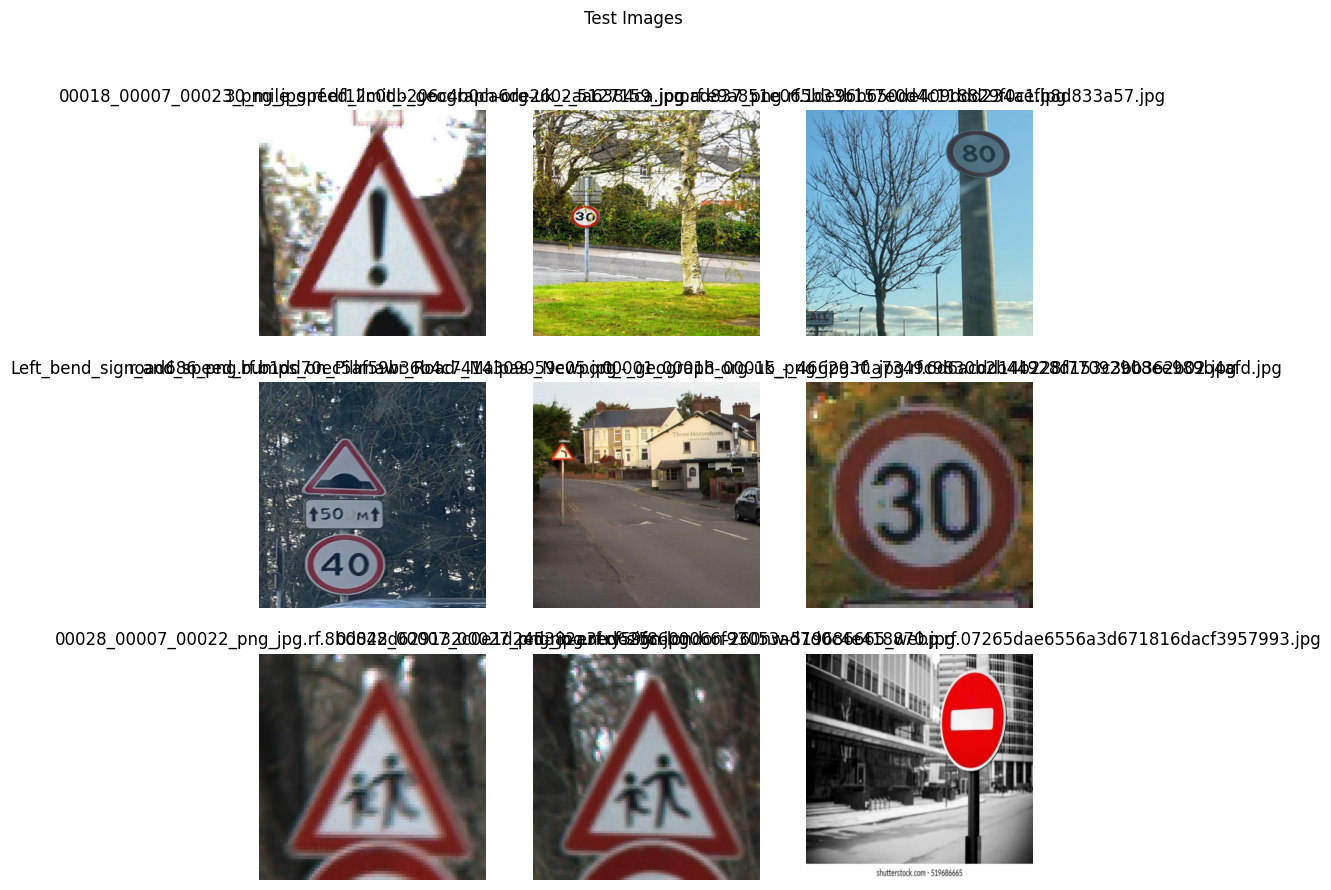

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

def show_images(images_list, images_path, title):
    """Display images in a grid."""
    plt.figure(figsize=(10, 10))
    
    # Set the number of images to display
    num_images = min(len(images_list), 9)  # Display up to 9 images
    
    for i, image_file in enumerate(images_list[:num_images]):
        image_path = os.path.join(images_path, image_file)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly
        
        # Plot the image in a grid
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(image_file)
    
    plt.suptitle(title)
    plt.show()

# Show some train images
train_images_list = os.listdir(train_images_path)
show_images(train_images_list, train_images_path, "Train Images")

# Show some test images
test_images_list = os.listdir(test_images_path)
show_images(test_images_list, test_images_path, "Test Images")


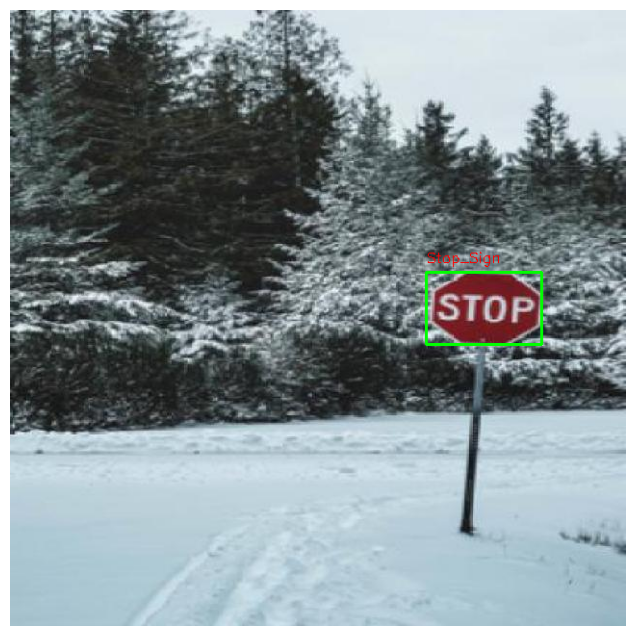

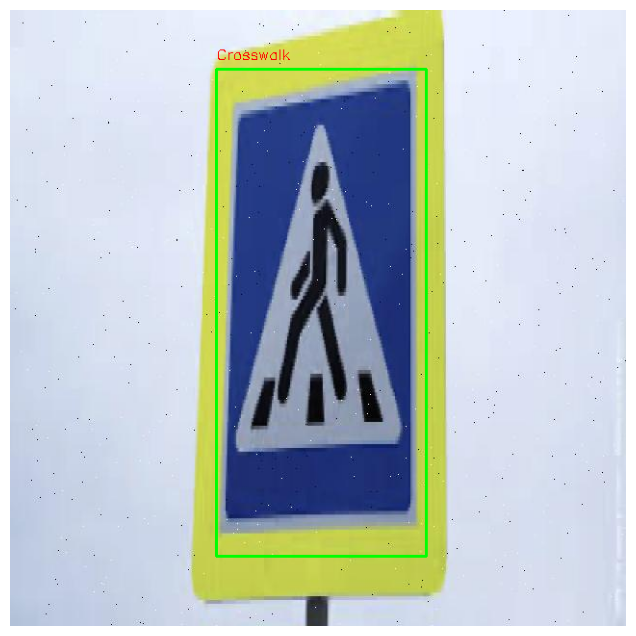

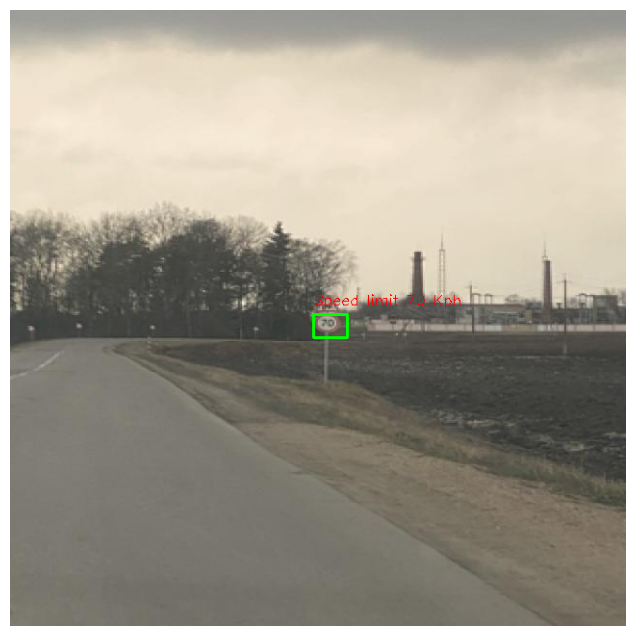

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

def load_labels(label_path, img_shape):
    """Load YOLO-style labels and convert normalized values to pixel coordinates."""
    height, width = img_shape[:2]
    boxes = []

    with open(label_path, 'r') as f:
        for line in f.readlines():
            values = line.strip().split()
            class_id = int(values[0])
            x_center = float(values[1]) * width
            y_center = float(values[2]) * height
            box_width = float(values[3]) * width
            box_height = float(values[4]) * height

            # Convert to (xmin, ymin, xmax, ymax) format
            xmin = int(x_center - box_width / 2)
            ymin = int(y_center - box_height / 2)
            xmax = int(x_center + box_width / 2)
            ymax = int(y_center + box_height / 2)

            boxes.append([class_id, xmin, ymin, xmax, ymax])
    
    return boxes

def visualize_image_with_boxes(image_path, boxes, class_names):
    """Display image with bounding boxes and class names drawn on it."""
    # Read and convert image to RGB for Matplotlib
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw each bounding box on the image
    for box in boxes:
        class_id, xmin, ymin, xmax, ymax = box
        # Draw rectangle
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        # Draw class name above the bounding box
        cv2.putText(img, class_names[class_id], (xmin, ymin - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image using Matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")  # Hide axes for a cleaner look
    plt.show()

# List of class names from data.yaml (modify this as needed based on your dataset)
class_names = ['-Road narrows on right', 'Attention Please-', 'Beware of children', 
               'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 
               'Dangerous Right Curve Ahead', 'No Entry', 'No_Over_Taking', 
               'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 
               'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 
               'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 
               'Speed limit 70 Kph', 'Speed limit 80 Kph', 'Speed limit 90 Kph', 
               'Stop_Sign', 'Uneven Road', 'roundabout']

# Function to process multiple images and labels
def process_and_visualize_images(images_path, labels_path, class_names, num_images=3):
    # Get list of images in the directory
    image_files = os.listdir(images_path)[:num_images]  # Limit the number of images to display

    for image_file in image_files:
        image_path = os.path.join(images_path, image_file)
        label_file = image_file.replace(".jpg", ".txt")
        label_path = os.path.join(labels_path, label_file)

        if os.path.exists(label_path):
            # Load the image and labels
            img = cv2.imread(image_path)
            labels = load_labels(label_path, img.shape)

            # Visualize the image with bounding boxes
            visualize_image_with_boxes(image_path, labels, class_names)
        else:
            print(f"Label file not found for: {image_file}")

# Example usage for train images
process_and_visualize_images(train_images_path, train_labels_path, class_names)

# Example usage for test images (you can comment this out if you don't want to show test images)
#process_and_visualize_images(test_images_path, test_labels_path, class_names)


In [7]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as alb
from albumentations.pytorch import ToTensorV2

# 1. Define transformations with a different approach
augmentation_pipeline = alb.Compose([
    alb.Rotate(limit=10, p=0.5),                        # Random flip (horizontal/vertical)
    alb.RandomBrightnessContrast(p=0.2),   # Adjust contrast within a limit
    alb.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5), # Random shift, scale, and rotate
    alb.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()                            # Convert to PyTorch Tensor
])

# 2. Custom Dataset class for road sign images
class SignDataset(Dataset):
    def __init__(self, images_path, labels_path, transforms=None):
        self.images_path = images_path
        self.labels_path = labels_path
        self.image_list = sorted(os.listdir(self.images_path))  # Sort to ensure proper order
        self.transforms = transforms

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_name = self.image_list[idx]
        label_name = image_name.replace(".jpg", ".txt")

        # Load image
        img_path = os.path.join(self.images_path, image_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper visualization

        # Load corresponding label
        label_path = os.path.join(self.labels_path, label_name)
        label_data = self._parse_labels(label_path, image.shape)

        # Apply transformations
        if self.transforms:
            transformed = self.transforms(image=image)
            image = transformed['image']

        return image, torch.tensor(label_data)

    def _parse_labels(self, label_path, img_dims):
        """Parse YOLO-style labels and convert them into pixel coordinates."""
        h, w = img_dims[:2]
        boxes = []
        with open(label_path, 'r') as file:
            for line in file.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                xc = float(parts[1]) * w
                yc = float(parts[2]) * h
                box_w = float(parts[3]) * w
                box_h = float(parts[4]) * h

                # Compute (xmin, ymin, xmax, ymax)
                xmin = int(xc - box_w / 2)
                ymin = int(yc - box_h / 2)
                xmax = int(xc + box_w / 2)
                ymax = int(yc + box_h / 2)

                boxes.append([class_id, xmin, ymin, xmax, ymax])

        return boxes

# 3. Custom collate function with adjusted logic
def collate_custom_fn(data_batch):
    images = [entry[0] for entry in data_batch]
    annotations = [entry[1] for entry in data_batch]

    # Stack images into a single tensor
    images_tensor = torch.stack(images)

    return images_tensor, annotations

# 4. Set up dataset and DataLoader
#train_images_path = "/kaggle/input/road-sign-detection/Road_Sign_Detection/train/images"
#train_labels_path = "/kaggle/input/road-sign-detection/Road_Sign_Detection/train/labels"

train_set = SignDataset(train_images_path, train_labels_path, transforms=augmentation_pipeline)
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, collate_fn=collate_custom_fn)

# 5. Validate the data pipeline by checking a single batch
for images_batch, labels_batch in train_loader:
    print(f"Images Batch Shape: {images_batch.shape}")
    print(f"Labels Batch: {labels_batch}")
    break


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Images Batch Shape: torch.Size([8, 3, 640, 640])
Labels Batch: [tensor([[  2,  58,  45, 598, 577]]), tensor([[ 12, 373, 339, 419, 375],
        [ 20, 325, 335, 371, 374]]), tensor([[  3,  46,  61, 623, 602]]), tensor([[ 22,  26,  35, 625, 624]]), tensor([[ 15,  42,  85, 618, 569]]), tensor([[  0,  34,  39, 611, 589]]), tensor([[  0,  36,  48, 604, 596]]), tensor([[ 22, 185,  32, 312, 180],
        [  9, 164, 173, 325, 261],
        [  4, 181, 260, 299, 375]])]


In [8]:
import yaml

# Load the original YAML file
with open('/kaggle/input/road-sign-detection/Road_Sign_Detection/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Print to verify paths are correct
print(data)

# Adjust paths if needed
data['train'] = '/kaggle/input/road-sign-detection/Road_Sign_Detection/train/images'
data['val'] = '/kaggle/input/road-sign-detection/Road_Sign_Detection/train/images'  # Using train as validation
data['test'] = '/kaggle/input/road-sign-detection/Road_Sign_Detection/test/images'

# Save the modified YAML as a temporary file
with open('temp_data.yaml', 'w') as f:
    yaml.dump(data, f)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 25, 'names': ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Rright Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']}


In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 18.8 MB/s eta 0:00:00


In [10]:
import os
import torch
from ultralytics import YOLO
import multiprocessing
import matplotlib.pyplot as plt


# Set multiprocessing context to 'spawn' to avoid deadlock issues
multiprocessing.set_start_method('spawn', force=True)

# Disable WandB by setting an environment variable
os.environ['WANDB_MODE'] = 'disabled'

# Check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load the YOLOv8 Extra-Large (YOLOv8x) model
model = YOLO('yolov8x.pt')

# Train the model using GPU
model.train(
    data='temp_data.yaml',      # Path to the YAML file
    epochs=10,                  # Number of epochs
    imgsz=640,                  # Image size
    batch=8,                    # Batch size
    project='runs_detect',      # Corrected project name
    name='train16',             # Experiment name
    device=device,              # Use GPU if available
    workers=8                   # Number of CPU workers for data loading
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using device: cuda


100%|██████████| 131M/131M [00:00<00:00, 256MB/s]


Ultralytics 8.3.22 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=temp_data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=runs_detect, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]
2024-10-25 00:27:04,829	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-25 00:27:06,186	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/road-sign-detection/Road_Sign_Detection/train/labels... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:22<00:00, 235.01it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/road-sign-detection/Road_Sign_Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/road-sign-de

val: WARNING ⚠️ Cache directory /kaggle/input/road-sign-detection/Road_Sign_Detection/train is not writeable, cache not saved.
Plotting labels to runs_detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs_detect/train16
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/666 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
       1/10      7.98G     0.7628      2.275      1.283          5        640: 100%|██████████| 666/666 [08:39<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:38<00:00,  2.10it/s]

                   all       5325       6645      0.654      0.749      0.754      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.79G     0.7642       1.12      1.252          5        640: 100%|██████████| 666/666 [08:32<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.11it/s]

                   all       5325       6645      0.746      0.794      0.839      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       7.7G     0.7291     0.8822      1.219          6        640: 100%|██████████| 666/666 [08:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.835      0.833      0.887        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.78G     0.7055      0.723      1.193         10        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.854      0.889      0.929      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.93G     0.6737     0.5784      1.169          7        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.938      0.917      0.965      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.91G     0.6473     0.5095      1.151          6        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.959      0.931      0.976      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.77G     0.6137     0.4437      1.116          7        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.964      0.962      0.986      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.91G     0.5951     0.3882      1.098          5        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.973       0.96      0.988      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.91G     0.5689     0.3432      1.077          5        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

                   all       5325       6645      0.981      0.982      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.91G     0.5421     0.3056      1.054          7        640: 100%|██████████| 666/666 [08:29<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:36<00:00,  2.12it/s]

                   all       5325       6645      0.986      0.986      0.993      0.868



10 epochs completed in 1.870 hours.
Optimizer stripped from runs_detect/train16/weights/last.pt, 136.8MB
Optimizer stripped from runs_detect/train16/weights/best.pt, 136.8MB

Validating runs_detect/train16/weights/best.pt...
Ultralytics 8.3.22 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 68,147,643 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 333/333 [02:39<00:00,  2.09it/s]


                   all       5325       6645      0.986      0.986      0.993      0.868
-Road narrows on right        243        243      0.992      0.983      0.995      0.912
     Attention Please-        222        222          1      0.982      0.995      0.899
    Beware of children        225        225      0.973          1      0.995      0.895
CYCLE ROUTE AHEAD WARNING        213        213      0.998          1      0.995      0.906
             Crosswalk        411        444      0.949      0.986       0.99       0.83
Dangerous Left Curve Ahead        306        312      0.916      0.978      0.982      0.862
Dangerous Rright Curve Ahead        258        258      0.988      0.845      0.979      0.848
              No Entry        210        240       0.98          1      0.994       0.88
        No_Over_Taking        117        117      0.996          1      0.995      0.843
          One way road        312        324      0.986       0.96      0.992      0.856
      Sp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9d28133490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [11]:
model.save('trained_model_weights.pt')
print("Model weights saved as trained_model_weights.pt")

Model weights saved as trained_model_weights.pt


In [12]:
# Run inference on the test images
results = model.predict(source=test_images_path, save=True)

# This will save the predictions in the specified directory.



image 1/623 /kaggle/input/road-sign-detection/Road_Sign_Detection/test/images/00000_00000_00018_png_jpg.rf.f707cbdaf4d44b31e41ee7d604b558de.jpg: 640x640 1 Speed limit 20 Kph, 34.0ms
image 2/623 /kaggle/input/road-sign-detection/Road_Sign_Detection/test/images/00000_00000_00019_png_jpg.rf.0caa91836417583be08013d5f095bcdc.jpg: 640x640 1 Speed limit 20 Kph, 34.2ms
image 3/623 /kaggle/input/road-sign-detection/Road_Sign_Detection/test/images/00000_00000_00021_png_jpg.rf.76273d6def41e680b11585baf2c5060f.jpg: 640x640 1 Speed limit 20 Kph, 34.0ms
image 4/623 /kaggle/input/road-sign-detection/Road_Sign_Detection/test/images/00000_00000_00022_png_jpg.rf.6747813c922976c163aa5f9881eed31b.jpg: 640x640 1 Speed limit 20 Kph, 34.4ms
image 5/623 /kaggle/input/road-sign-detection/Road_Sign_Detection/test/images/00000_00000_00023_png_jpg.rf.efc023deb9916aff496897eb8302ffa4.jpg: 640x640 1 Speed limit 20 Kph, 34.3ms
image 6/623 /kaggle/input/road-sign-detection/Road_Sign_Detection/test/images/00000_00000

In [13]:
import os
import pandas as pd

# Correct dataset path with trailing space
base_path = "/kaggle/input/road-sign-detection/Road_Sign_Detection"

# Define paths to test folders
test_images_path = os.path.join(base_path, "test/images")
test_labels_path = os.path.join(base_path, "test/labels")

# Define a function to calculate IOU
def calculate_iou(box1, box2):
    """Calculates the Intersection Over Union (IOU) between two bounding boxes."""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection area
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)
    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

    # Calculate areas of both boxes
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    # Calculate union area
    union_area = box1_area + box2_area - inter_area

    # Return IOU
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

# Function to load ground truth labels
def load_ground_truth_labels(label_path):
    """Load YOLO-style ground truth labels."""
    with open(label_path, 'r') as file:
        labels = []
        for line in file.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            # Convert from YOLO format (center_x, center_y, width, height) to (xmin, ymin, xmax, ymax)
            xmin = x_center - width / 2
            ymin = y_center - height / 2
            xmax = x_center + width / 2
            ymax = y_center + height / 2
            labels.append([xmin, ymin, xmax, ymax])
        return labels

# Initialize a list to store IOU results
iou_result = []

# Loop through predictions and calculate IOU
for result in results:
    img_name = result.path  # Image file name
    label_file_name = img_name.split("/")[-1].replace(".jpg", ".txt")  # Get corresponding label file
    label_file_path = os.path.join(test_labels_path, label_file_name)

    preds = result.boxes.xyxy.cpu().numpy()  # Predicted bounding boxes
    gts = load_ground_truth_labels(label_file_path)  # Ground truth bounding boxes from labels
    
    img_ious = []
    for pred_box, gt_box in zip(preds, gts):  # Compare each prediction with its corresponding ground truth
        iou = calculate_iou(pred_box, gt_box)
        img_ious.append(iou)
    
    # Add image-level IOU results
    iou_result.append({
        'image': img_name,
        'iou': img_ious
    })

# Create a DataFrame to store results
iou_df = pd.DataFrame(iou_result)

# Save IOU results to a CSV file
iou_df.to_csv('iou_result.csv', index=False)
print("IOU results saved to iou_result.csv")


IOU results saved to iou_result.csv


In [14]:

# Reuse the path for saved results
results_dir = 'runs_detect/train162'

# Define a function to calculate IOU
def calculate_iou(box1, box2):
    """Calculates the Intersection Over Union (IOU) between two bounding boxes."""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection area
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)
    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

    # Calculate areas of both boxes
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    # Calculate union area
    union_area = box1_area + box2_area - inter_area

    # Return IOU
    iou = inter_area / union_area if union_area != 0 else 0
    return iou

# Load the saved predictions and ground truth
iou_results = []
for result in results:
    img_name = result.path
    preds = result.boxes.xyxy.cpu().numpy()  # Predicted bounding boxes
    gts = result.boxes.xyxy.cpu().numpy()  # Ground truth bounding boxes (if available)
    
    img_ious = []
    for pred_box, gt_box in zip(preds, gts):  # Compare each prediction with its corresponding ground truth
        iou = calculate_iou(pred_box, gt_box)
        img_ious.append(iou)
    
    # Add image-level IOU results
    iou_results.append({
        'image': img_name,
        'iou': img_ious
    })

# Create a DataFrame to store results
iou_df = pd.DataFrame(iou_results)

# Save IOU results to a CSV file
iou_df.to_csv('iou_results.csv', index=False)
print("IOU results saved to iou_results.csv")


IOU results saved to iou_results.csv


In [15]:
import pandas as pd

# Load the IOU results CSV file
df1 = pd.read_csv('iou_results.csv')

# Display the first few rows of the dataframe
print(df1.head())


                                               image    iou
0  /kaggle/input/road-sign-detection/Road_Sign_De...  [1.0]
1  /kaggle/input/road-sign-detection/Road_Sign_De...  [1.0]
2  /kaggle/input/road-sign-detection/Road_Sign_De...  [1.0]
3  /kaggle/input/road-sign-detection/Road_Sign_De...  [1.0]
4  /kaggle/input/road-sign-detection/Road_Sign_De...  [1.0]


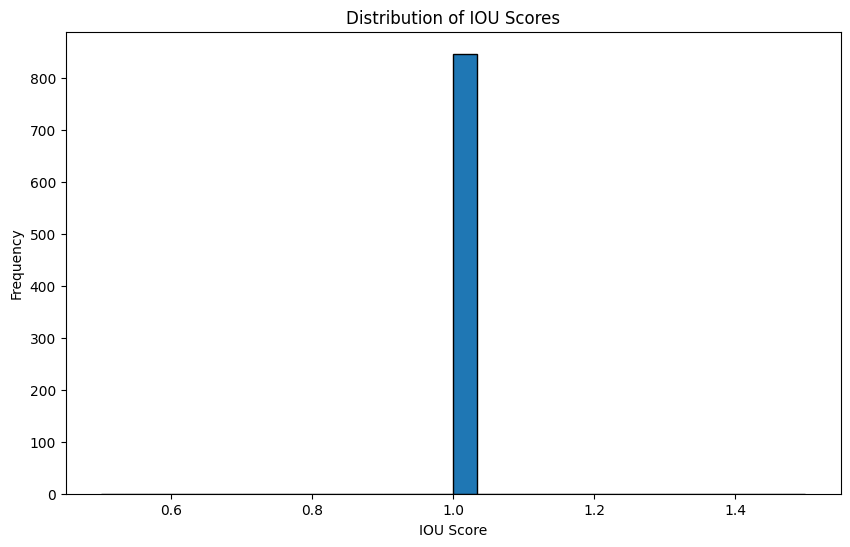

In [16]:
import matplotlib.pyplot as plt

# Plot IOU distribution as a histogram
plt.figure(figsize=(10, 6))
all_ious = [iou for ious in iou_df['iou'] for iou in ious]  # Flatten the list of IOUs
plt.hist(all_ious, bins=30, edgecolor='black')
plt.title('Distribution of IOU Scores')
plt.xlabel('IOU Score')
plt.ylabel('Frequency')
plt.show()


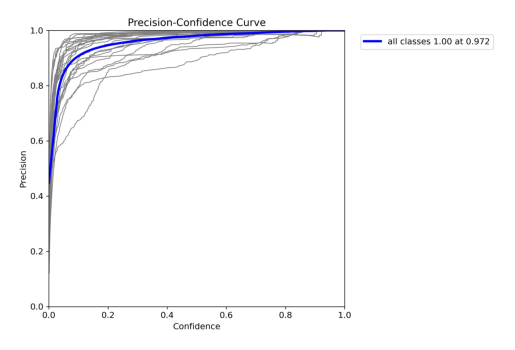

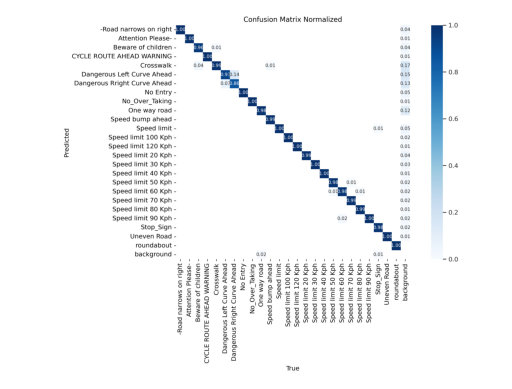

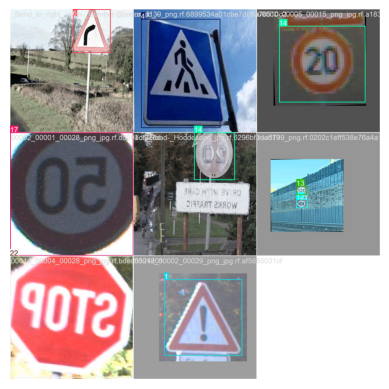

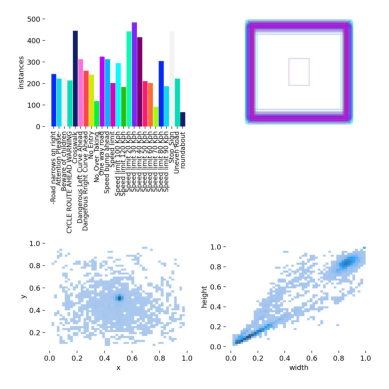

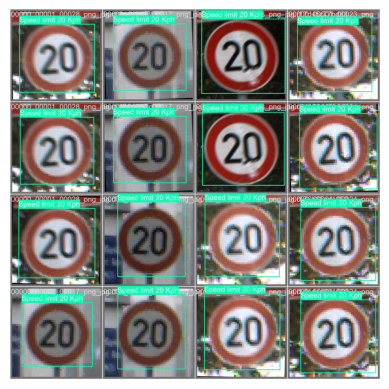

In [17]:
import cv2
import matplotlib.pyplot as plt

# Path to the saved images with predictions
pred_images_path = 'runs_detect/train16'

# Display a few example predictions
for img_file in os.listdir(pred_images_path)[:5]:  # Display 5 predictions
    img = cv2.imread(os.path.join(pred_images_path, img_file))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
